In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
!pip3 install searchgrid

In [3]:
#read the file

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(), test_data.head()

(   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.288585          -0.020294          -0.132905         -0.995279   
 1           0.278419          -0.016411          -0.123520         -0.998245   
 2           0.279653          -0.019467          -0.113462         -0.995380   
 3           0.279174          -0.026201          -0.123283         -0.996091   
 4           0.276629          -0.016570          -0.115362         -0.998139   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.983111         -0.913526         -0.995112         -0.983185   
 1         -0.975300         -0.960322         -0.998807         -0.974914   
 2         -0.967187         -0.978944         -0.996520         -0.963668   
 3         -0.983403         -0.990675         -0.997099         -0.982750   
 4         -0.980817         -0.990482         -0.998321         -0.979672   
 
    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

In [5]:
print("Train Data: {}".format(train_data.shape))
print("Test Data: {}".format(test_data.shape))

Train Data: (7352, 563)
Test Data: (2947, 563)


In [6]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


In [7]:
print("Null values in Train Data: {}".format(train_data.isnull().values.any()))
print("Null values in Test Data: {}".format(test_data.isnull().values.any()))

Null values in Train Data: False
Null values in Test Data: False


In [8]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [9]:
# Train Data
train_col = train_data.drop(columns=['Activity','subject'])
train_tarcol = train_data['Activity']


#Test Data

test_col = test_data.drop(columns=['Activity','subject'])
test_tarcol = test_data['Activity']

In [10]:
count_train_act = train_data['Activity'].value_counts()

In [11]:
count_test_act = test_data['Activity'].value_counts()

In [12]:
activities = sorted(train_tarcol.unique())

Visualize the data

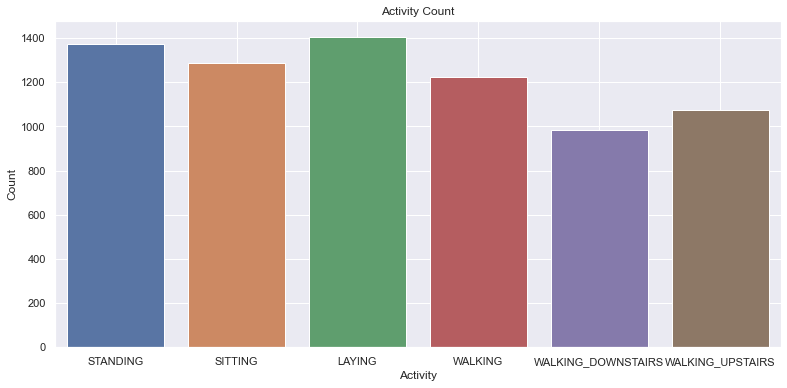

In [13]:
# activity count by plot

sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = train_data)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)


In [14]:
Acc = 0
Gyro = 0
other = 0

for value in train_col.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1

<BarContainer object of 3 artists>

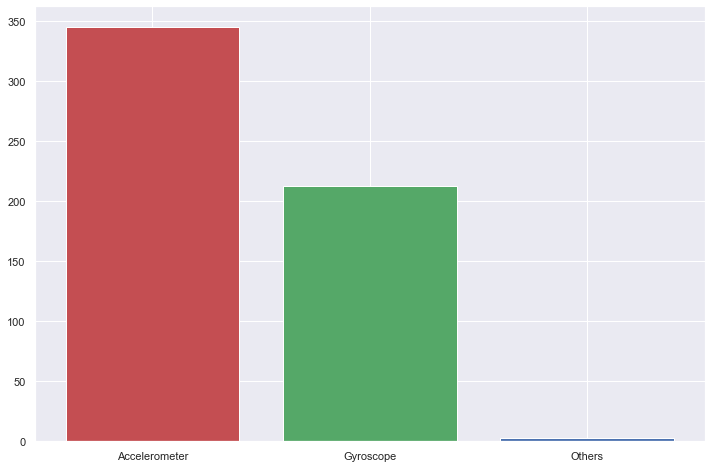

In [15]:
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

Accelerometer constitutes the maximum features, followed by Gyroscope. Other features are very less

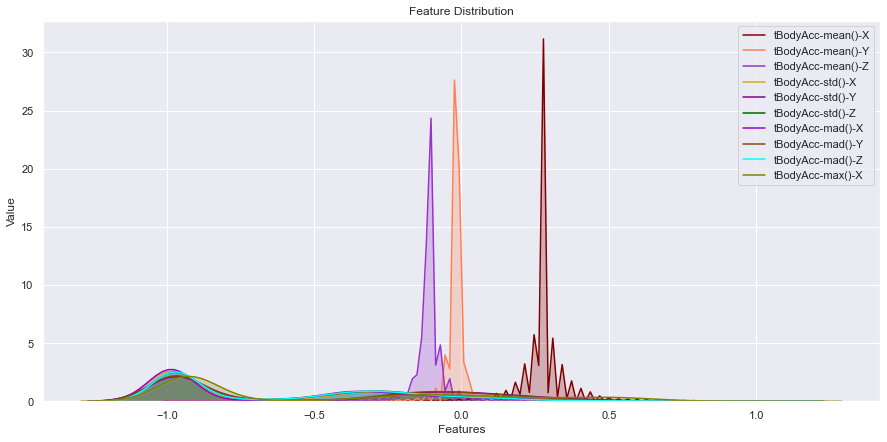

In [16]:

sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train_data.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(train_data[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

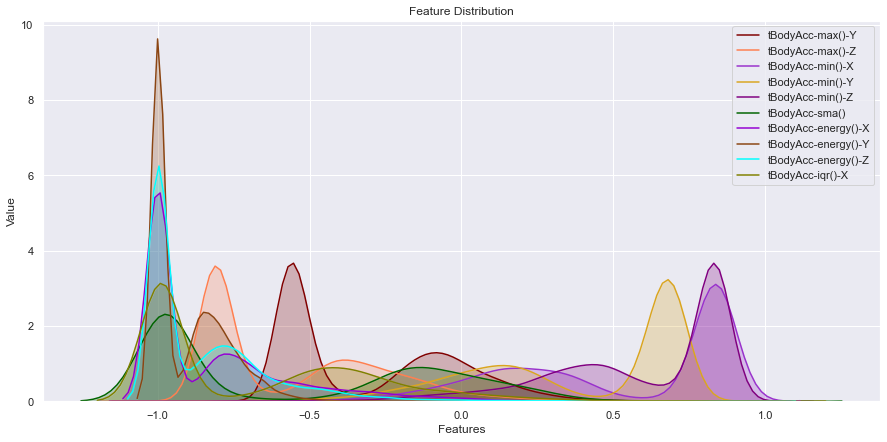

In [17]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train_data.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(train_data[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

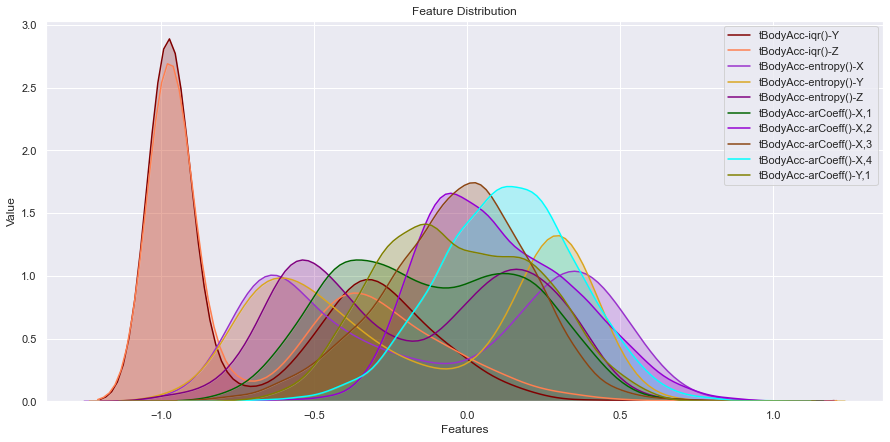

In [18]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train_data.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(train_data[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

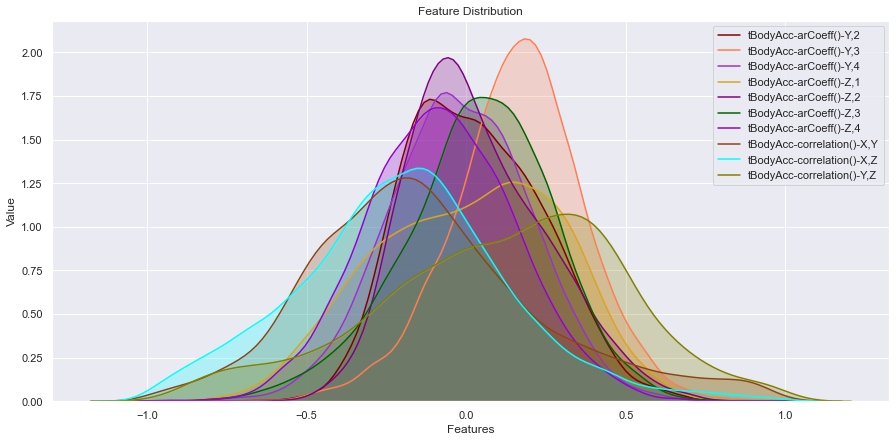

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train_data.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(train_data[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

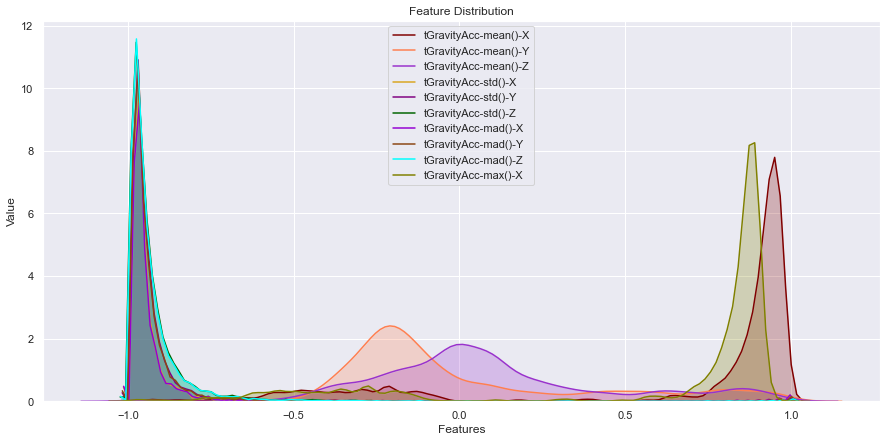

In [20]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train_data.columns[40:50]:
    index = index + 1
    ax1 = sns.kdeplot(train_data[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

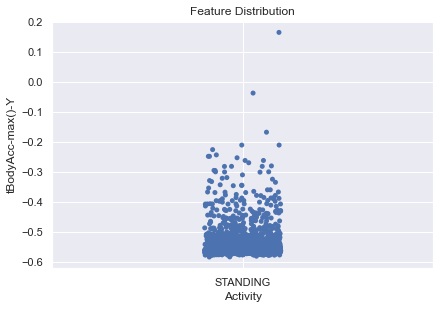

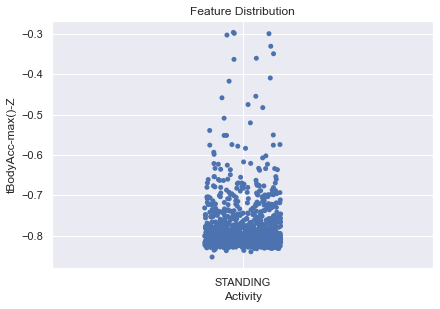

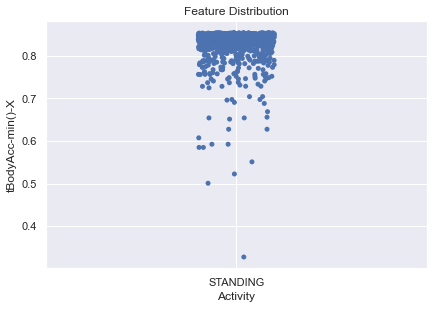

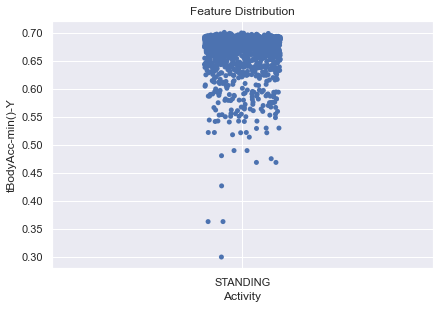

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
fig1 = sns.stripplot(x='Activity', y= train_data.loc[train_data['Activity']=="STANDING"].iloc[:,10], data= train_data.loc[train_data['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)
plt.subplot(224)
fig2 = sns.stripplot(x='Activity', y= train_data.loc[train_data['Activity']=="STANDING"].iloc[:,11], data= train_data.loc[train_data['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(223)
fig2 = sns.stripplot(x='Activity', y= train_data.loc[train_data['Activity']=="STANDING"].iloc[:,12], data= train_data.loc[train_data['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(222)
fig2 = sns.stripplot(x='Activity', y= train_data.loc[train_data['Activity']=="STANDING"].iloc[:,13], data= train_data.loc[train_data['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)

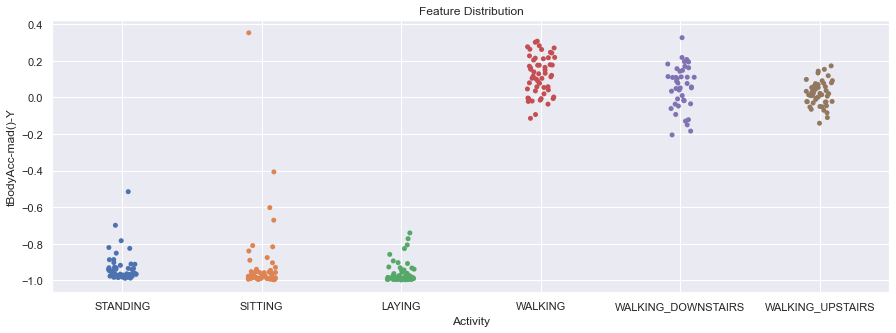

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= train_data.loc[train_data['subject']==15].iloc[:,7], data= train_data.loc[train_data['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

In [23]:
le = LabelEncoder() 

In [57]:

train_tarcol= le.fit_transform(train_tarcol)
#train_tarcol
test_tarcol= le.fit_transform(test_tarcol)
test_tarcol

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [33]:
# Train Data
#train_col = train_data.drop(columns=['Activity','subject'])
#train_tarcol = train_data['Activity']


#Test Data

#test_col = test_data.drop(columns=['Activity','subject'])
#test_tarcol = test_data['Activity']

In [73]:
#pca on train

#pca = PCA(n_components=2)
#pca.fit(train_col)
#train_col_pca = pca.transform(train_col)
#print("shape of PCA",train_col_pca.shape)
#print("train_col_PCA = ",train_col_pca)


pca_2 = PCA(0.95)
pca_2.fit(train_col)
pca_2.fit(test_col)
train_pca = pca_2.transform(train_col)
test_pca = pca_2.transform(test_col)
print(pca_2.n_components_)
print(test_pca)

65
[[-2.75498447 -1.38799372  0.12940323 ... -0.35133615  0.09212887
   0.26917306]
 [-4.39911524 -1.25675196 -0.48058654 ... -0.0678525   0.07339746
  -0.0913265 ]
 [-5.06633503 -0.61620813 -1.42889229 ...  0.21658717  0.43239332
  -0.20037456]
 ...
 [ 4.47173277 -0.68063398  1.02048831 ... -0.44339462 -0.02093974
  -0.16660278]
 [ 3.67803231 -1.04215265  1.10916051 ...  0.07459948  0.21226166
  -0.34204572]
 [ 3.89404952 -0.89129938  0.90908629 ...  0.19067453  0.11724624
   0.13785657]]


In [29]:
ex_variance = np.var(train_pca,axis = 0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

[0.66567637 0.04750804 0.04570664 0.01553806 0.01535915 0.01125526
 0.00958228 0.00995207 0.01011056 0.01187169 0.00925173 0.00734265
 0.00583751 0.00648307 0.00389827 0.00608665 0.00536582 0.00442494
 0.00452591 0.00398599 0.00347928 0.00402099 0.0038599  0.00383191
 0.00372551 0.00334046 0.00320964 0.00311204 0.00301812 0.00259559
 0.00258841 0.00269833 0.00312415 0.00271692 0.00243018 0.00241891
 0.00261469 0.00223455 0.00219734 0.00214271 0.00230374 0.00214545
 0.00217472 0.00224625 0.00229747 0.00176747 0.00177165 0.00170695
 0.00174983 0.00158464 0.00156352 0.0017951  0.00140362 0.00145896
 0.00157811 0.00134609 0.00143617 0.00137287 0.00146353 0.00149191
 0.00130422 0.00125666 0.00130888 0.0012373  0.00111265]


In [34]:
ex_variance = np.var(test_pca,axis = 0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

[0.64824647 0.05159838 0.03595892 0.01948276 0.0168404  0.01463045
 0.01203533 0.01125736 0.01073122 0.01024617 0.00936039 0.00818875
 0.00739124 0.00706304 0.00620279 0.00607906 0.00576293 0.00541835
 0.00509992 0.00482742 0.004666   0.00457761 0.00420954 0.00401221
 0.00378604 0.00369792 0.00355734 0.00349632 0.00327403 0.00317031
 0.00314259 0.00295675 0.00279336 0.00276878 0.00265997 0.00261666
 0.00255322 0.00240276 0.00233888 0.00224293 0.00219247 0.00208705
 0.00203475 0.00202626 0.0019105  0.00187041 0.00181226 0.00175299
 0.00167597 0.00162117 0.00158094 0.00154374 0.00149066 0.0013915
 0.00138255 0.0013588  0.00134748 0.00133023 0.00130462 0.00123005
 0.00120532 0.00115677 0.00113201 0.00111837 0.00109858]


In [ ]:
#Classification models


Logistic Regression

In [58]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000) 
lr.fit(train_pca, train_tarcol)
print(train_tarcol)

[2 2 2 ... 5 5 5]


In [59]:
# Predicting the test set result
y_pred = lr.predict(test_pca)
y_pred

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [60]:
#confusion matrix
cm = confusion_matrix(test_tarcol, y_pred)
cm

array([[534,   0,   3,   0,   0,   0],
       [  0, 422,  66,   0,   0,   3],
       [  0,  26, 504,   2,   0,   0],
       [  0,   0,   0, 491,   4,   1],
       [  0,   0,   0,   3, 400,  17],
       [  0,   0,   0,  38,  14, 419]], dtype=int64)

In [63]:
print(classification_report(test_tarcol, y_pred, labels=[1, 2, 3]))

print("Accuracy",accuracy_score(test_tarcol,y_pred)*100)

              precision    recall  f1-score   support

           1       0.94      0.86      0.90       491
           2       0.88      0.95      0.91       532
           3       0.92      0.99      0.95       496

   micro avg       0.91      0.93      0.92      1519
   macro avg       0.91      0.93      0.92      1519
weighted avg       0.91      0.93      0.92      1519

Accuracy 93.99389209365457


# Random Forest

In [64]:
rfc = RandomForestClassifier()

In [65]:
parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [3, 6, 9], 'max_features' : ['auto', 'log2']}

In [66]:
model=GridSearchCV(rfc,parameters,n_jobs=-1,cv=4,scoring='accuracy')
model.fit(train_pca, train_tarcol)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [67]:
from sklearn.metrics import accuracy_score
ypred=model.predict(test_pca)
accuracy=accuracy_score(test_tarcol,ypred)
accuracy


0.8975229046487954

In [68]:
print(classification_report(test_tarcol, ypred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.89      0.71      0.79       491
           2       0.78      0.92      0.85       532
           3       0.88      0.97      0.92       496

   micro avg       0.85      0.87      0.86      1519
   macro avg       0.85      0.87      0.85      1519
weighted avg       0.85      0.87      0.85      1519

